In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy

# Importance Sampling

**Problem** Given a random variable $X$ following a distribution with $p$ as its probability density function (pdf). We want to estimate the expectation $\mathbb{E}_p(f(X))$ where $f$ is an arbitrary function.

**Method (Importance Sampling)**

One way to estimate is to use the Monte Carlo approximation method, in which we sample values $x_1, x_2, ..., x_N$ from $p$ and make the estimation
$$
    \mathbb{E}_p(f(X)) = \int_{-\infty}^{\infty} f(x) p(x) dx \approx \frac{1}{N} \sum_{i=1}^{N} f(x_i).
$$

However, $p$ may be hard to sample from. Instead of doing so, we sample from a proposal density $q$ and estimate based on the values. 

The key idea of Importance Sampling is that
$$
    \int_{-\infty}^{\infty} f(x) p(x) dx
    = \int_{-\infty}^{\infty} f(x) \frac{p(x)}{q(x)} q(x) dx
    = \mathbb{E}_q \left[ f(X) \frac{p(X)}{q(X)} \right]
$$
which can be approximated in the same way as above: sampling values $x_1, x_2, \ldots, x_N$ from $q$ and computing
$$
    \mathbb{E}_q \left[ f(X) \frac{p(X)}{q(X)} \right] = \frac{1}{N} \sum_{i=1}^{N} \left[ f(x_i) \frac{p(x_i)}{q(x_i)} \right].
$$

The name "importance" stems from the ratio $p(x_i) / q(x_i)$ being considered the importance weights of the sample $x_i$ (which makes sense).

In [2]:
def importance_sampling(f, p_pdf, q_pdf, q_sample, N, return_history=False):
    x = q_sample(N)
    f = f(x) * p_pdf(x) / q_pdf(x)
    history = np.cumsum(f) / np.arange(1, N+1, 1)

    if return_history:
        return history[-1], history
    else:
        return history[-1]

**Example (Expectation of the Beta Distribution)** A random variable $X$ follows the Beta distribution $\text{Beta}(a, b)$, calculate its expectation.

The PDF of $X$ is:
$$
    p(x; a, b) = \frac{(a+b-1)!}{(a-1)!(b-1)!} x^{a-1} (1-x)^{b-1}
$$
when $x \in [0, 1]$ and $0$ otherwise.

To calculate the expectation is to calculate $\mathbb{E}(f(X))$ with $f(x) = x$.

In [3]:
def beta_pdf(x, a, b):
    return scipy.stats.beta.pdf(x, a, b)

def beta_expectation(a, b):
    return a / (a + b)

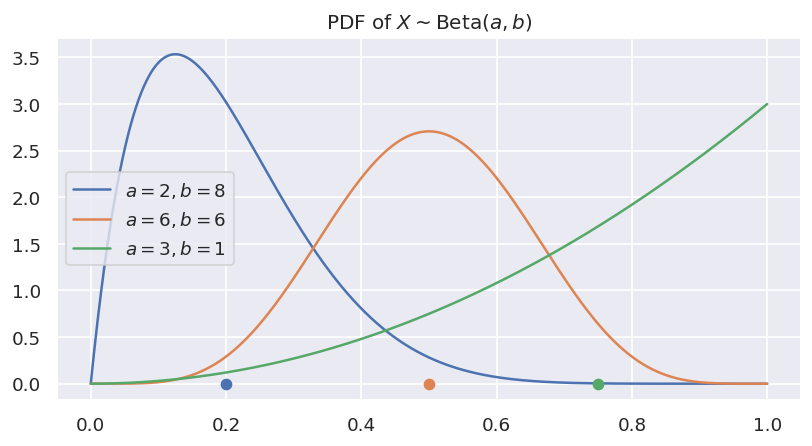

In [4]:
As = [2, 6, 3]
Bs = [8, 6, 1]

fig = plt.figure(figsize=(8, 4), dpi=120)
x = np.linspace(start=0, stop=1, num=1000)
for A, B in zip(As, Bs):
    f = beta_pdf(x, A, B)
    p = plt.plot(x, f, label=f'$a = {A}, b = {B}$')

    e = beta_expectation(A, B)
    plt.plot(e, 0, 'o', color=p[0].get_color())
plt.title('PDF of $X \sim$Beta$(a, b)$')
plt.legend()
plt.show()

We first use the uniform distribution on $[0, 1]$ as the proposal density. The PDF is $q(x; a, b) = 1.0, \forall x \in [a, b]$ and $0$ otherwise.

In [5]:
def uniform_pdf(x, a=0.0, b=1.0):
    return 1.0 * (a <= x) * (x <= b)

def uniform_sample(N, a=0.0, b=1.0):
    return np.random.rand(N) * (b - a) + a

In [6]:
a1 = 2.0
b1 = 8.0
N1 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a1, b1)
q_pdf = uniform_pdf
q_sample = uniform_sample

u1, h1 = importance_sampling(f, p_pdf, q_pdf, q_sample, N=N1, return_history=True)

Estimated value: 0.2001462734509228
Real value 0.2


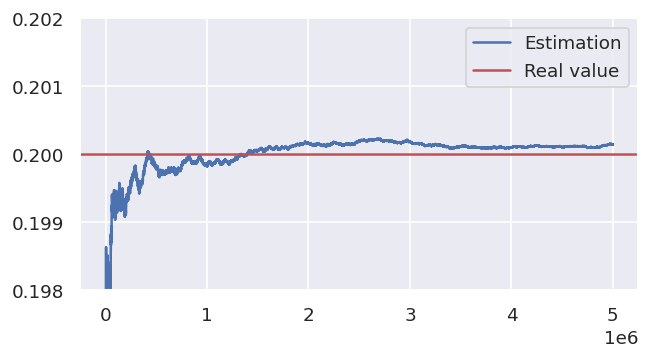

In [7]:
r1 = beta_expectation(a1, b1)

print('Estimated value:', u1)
print('Real value', r1)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h1), step)
sns.lineplot(x=x, y=h1[x], label='Estimation')
plt.axhline(r1, color='r', label='Real value')
plt.ylim(r1 - 0.002, r1 + 0.002)
plt.legend()
plt.show()

In [8]:
a2 = 3.0
b2 = 1.0
N2 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a2, b2)
q_pdf = uniform_pdf
q_sample = uniform_sample

u2, h2 = importance_sampling(f, p_pdf, q_pdf, q_sample, N=N2, return_history=True)

Estimated value: 0.749845498264427
Real value 0.75


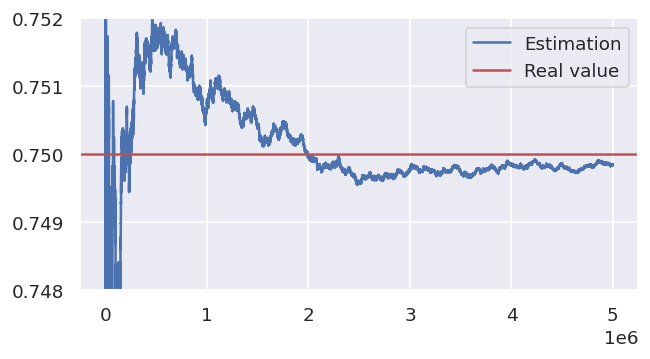

In [9]:
r2 = beta_expectation(a2, b2)

print('Estimated value:', u2)
print('Real value', r2)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h2), step)
sns.lineplot(x=x, y=h2[x], label='Estimation')
plt.axhline(r2, color='r', label='Real value')
plt.ylim(r2 - 0.002, r2 + 0.002)
plt.legend()
plt.show()

We then use the normal distribution. The PDF is 
$$
    q(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(x - \mu)^2}{2\sigma^2} \right), \forall x \in \mathbb{R}.
$$

In [10]:
def normal_pdf(x, mu, sigma):
    return scipy.stats.norm.pdf(x, mu, sigma)

def normal_sample(N, mu, sigma):
    return np.random.randn(N) * sigma + mu

In [11]:
a1 = 2.0
b1 = 8.0
N1 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_pdf(x, a1, b1)

mu1, sigma1 = 0.2, 0.2
q1_pdf = lambda x: normal_pdf(x, mu1, sigma1)
q1_sample = lambda N: normal_sample(N, mu1, sigma1)

mu2, sigma2 = 0.8, 0.2
q2_pdf = lambda x: normal_pdf(x, mu2, sigma2)
q2_sample = lambda N: normal_sample(N, mu2, sigma2)

u3, h3 = importance_sampling(f, p_pdf, q1_pdf, q1_sample, N=N1, return_history=True)
u4, h4 = importance_sampling(f, p_pdf, q2_pdf, q2_sample, N=N1, return_history=True)

Estimated value 1: 0.2000085412182431
Estimated value 2: 0.1984876196104516
Real value 0.2


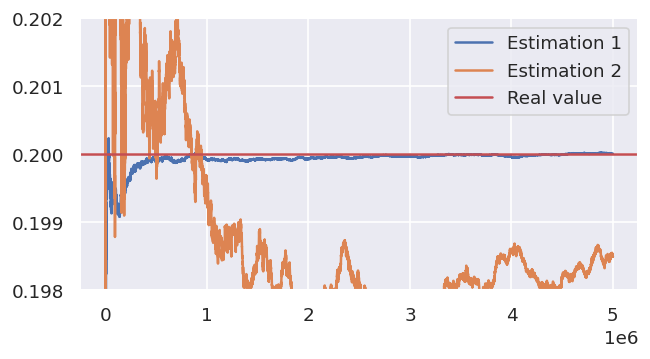

In [12]:
r1 = beta_expectation(a1, b1)

print('Estimated value 1:', u3)
print('Estimated value 2:', u4)
print('Real value', r1)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h3), step)
sns.lineplot(x=x, y=h3[x], label='Estimation 1')
sns.lineplot(x=x, y=h4[x], label='Estimation 2')
plt.axhline(r1, color='r', label='Real value')
plt.ylim(r1 - 0.002, r1 + 0.002)
plt.legend()
plt.show()

The proposal $\mathcal{N}(0.2, 0.2^2)$ seems to perform better than $\mathcal{N}(0.8, 0.2^2)$. What seems to be the problem here?

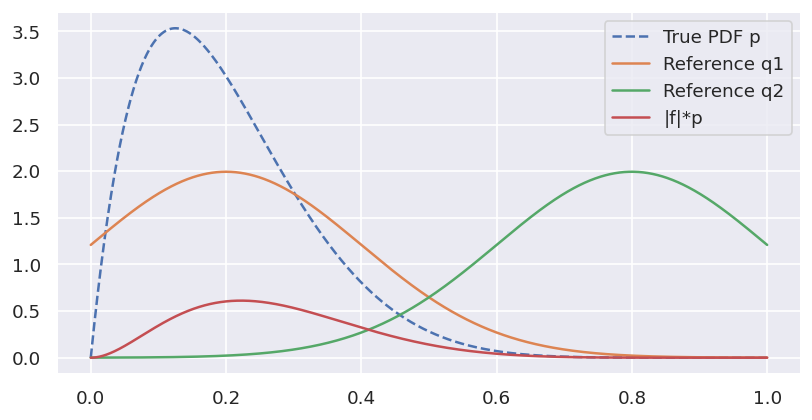

In [13]:
fig = plt.figure(figsize=(8, 4), dpi=120)

x = np.linspace(start=0, stop=1, num=1000)
f = x
p = beta_pdf(x, 2, 8)
q1 = normal_pdf(x, 0.2, 0.2)
q2 = normal_pdf(x, 0.8, 0.2)
plt.plot(x, p, label='True PDF p', linestyle='dashed')
plt.plot(x, q1, label='Reference q1')
plt.plot(x, q2, label='Reference q2')
plt.plot(x, np.abs(f) * p, label='|f|*p')

plt.legend()
plt.show()

Intuitively, when we estimate (the expectation of) $f(X)$ we should be paying attention to the areas where $x$ has a higher chance of contributing **and** $f(x)$ has high (absolute) values so that it contributes more to the expectation. It is suggested we pick a proposal $q$ so that the probability is dense ($q(x)$ is high) where $|f(x)| p(x)$ is large. From the graph, the first normal distribution is a better choice and the effect can be seen from the example above.

Note that it is not true that $q$ should closely resemble $p$ or has similar peaks.

# Self-normalizing weights

Importance Sampling is possible even for un-normalized target distribution, in other words, $\tilde{p}$ so that $p(x) = \tilde{p}(x)/z_p$. It is even possible when we have un-normalized proposal distribution, in other words, $\tilde{q}$ so that $q(x) = \tilde{q}(x)/z_q$. 

$z_p, z_q$ are the normalizing constants of $p$ and $q$ respectively. This normalizing constant is usually to ensure the PDF integrates to $1$, meaning that $z_p = \int_{-\infty}^{\infty} \tilde{p}(x) dx$ and same for $z_q$.

Same as before, we have
$$
    \int_{-\infty}^{\infty} f(x) p(x) dx
    = \int_{-\infty}^{\infty} f(x) \frac{p(x)}{q(x)} q(x) dx
    = \int_{-\infty}^{\infty} f(x) \frac{\tilde{p}(x)}{z_p} \frac{z_q}{\tilde{q}(x)} q(x) dx
    = \frac{z_q}{z_p} \mathbb{E}_q \left[ f(X) \frac{\tilde{p}(X)}{\tilde{q}(X)} \right]
$$

The difference is the ratio $z_q/z_p$. We can approximate this ratio in parallel by noticing that
$$
    \frac{z_p}{z_q} 
    = \frac{1}{z_q} \int_{-\infty}^{\infty} \tilde{p}(x) dx 
    = \frac{1}{z_q} \int_{-\infty}^{\infty} \frac{\tilde{p}(x)}{\tilde{q}(x)} \tilde{q}(x) dx
    = \int_{-\infty}^{\infty} \frac{\tilde{p}(x)}{\tilde{q}(x)} \frac{\tilde{q}(x)}{z_q} dx
    = \int_{-\infty}^{\infty} \frac{\tilde{p}(x)}{\tilde{q}(x)} q(x) dx
    = \mathbb{E}_q \left[ \frac{\tilde{p}(X)}{\tilde{q}(X)} \right]
$$
Once again using Monte-Carlo approximation, we sample values $x_1, x_2, \dots, x_N$ from $q$ and compute
$$
    \frac{z_p}{z_q} \approx \sum_{i=1}^{N} \frac{\tilde{p}(x_i)}{\tilde{q}(x_i)}
$$

In summary, to estimate $\mathbb{E}_p(f(X))$ for $x \sim p(x) = \tilde{p}(x) / z_p$ based on a proposed distribution $q(x) = \tilde{q}(x) / z_q$ (which we can easily sample from), we sample $x_1, x_2, \dots, x_N$ and compute
$$
    \mathbb{E}_p(f(X)) \approx \frac{\sum_{i=1}^{N} f(x_i) \frac{\tilde{p}(x_i)}{\tilde{q}(x_i)} }{\sum_{i=1}^{N} \frac{\tilde{p}(x_i)}{\tilde{q}(x_i)}}
$$

In [14]:
def importance_sampling_unnorm(f, p_pdf, q_pdf, q_sample, N, return_history=False):
    x = q_sample(N)
    w = p_pdf(x) / q_pdf(x)
    fw = f(x) * w
    history = np.cumsum(fw) / np.cumsum(w)

    if return_history:
        return history[-1], history
    else:
        return history[-1]

**Example**

The un-normalized PDF of the Beta distribution is
$$
    \tilde{p}(x; a, b) = x^{a-1} (1-x)^{b-1}
$$
when $x \in [0, 1]$ and $0$ otherwise.

The un-normalized PDF of the Normal distribution is
$$
    \tilde{q}(x; \mu, \sigma) = \exp \left( - \frac{(x - \mu)^2}{2\sigma^2} \right), \forall x \in \mathbb{R}.
$$

In [15]:
def beta_unnorm_pdf(x, a, b):
    p = x ** (a - 1) * (1 - x) ** (b - 1)
    p[x > 1] = 0.0
    p[x < 0] = 0.0
    return p

def normal_unnorm_pdf(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

In [16]:
a1 = 2.0
b1 = 8.0
N1 = 5000000

f = lambda x: x
p_pdf = lambda x: beta_unnorm_pdf(x, a1, b1)

mu1, sigma1 = 0.2, 0.2
q1_pdf = lambda x: normal_unnorm_pdf(x, mu1, sigma1)
q1_sample = lambda N: normal_sample(N, mu1, sigma1)

mu2, sigma2 = 0.8, 0.2
q2_pdf = lambda x: normal_unnorm_pdf(x, mu2, sigma2)
q2_sample = lambda N: normal_sample(N, mu2, sigma2)

u3, h3 = importance_sampling_unnorm(f, p_pdf, q1_pdf, q1_sample, N=N1, return_history=True)
u4, h4 = importance_sampling_unnorm(f, p_pdf, q2_pdf, q2_sample, N=N1, return_history=True)

Estimated value 1: 0.1999546313998175
Estimated value 2: 0.19971797642382474
Real value 0.2


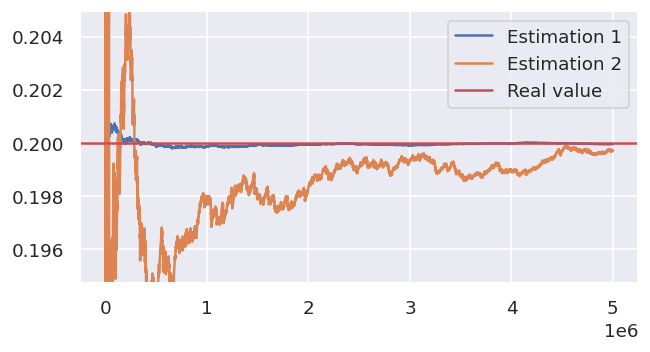

In [17]:
r1 = beta_expectation(a1, b1)

print('Estimated value 1:', u3)
print('Estimated value 2:', u4)
print('Real value', r1)

fig = plt.figure(figsize=(6, 3), dpi=120)
step = 100
x = range(0, len(h3), step)
sns.lineplot(x=x, y=h3[x], label='Estimation 1')
sns.lineplot(x=x, y=h4[x], label='Estimation 2')
plt.axhline(r1, color='r', label='Real value')
plt.ylim(min(h3[-1], h4[-1]) - 0.005, max(h3[-1], h4[-1]) + 0.005)
plt.legend()
plt.show()